In [4]:
import joblib
from functions import *
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
svm = joblib.load(get_svm_model_name())
rfc = joblib.load(get_rf_model_name())
lr = joblib.load(get_lr_model_name())

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

y_pred_svm = svm.predict(x_test)
y_pred_rfc = rfc.predict(x_test)
y_pred_lr = lr.predict(x_test)

confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix_svm)

[[305   0   0   0   0   0   0   0   0   0]
 [  0 325   2   1   3   0   1   0   1   0]
 [  0   1 286   3   0   1   1   5   0   0]
 [  2   3   2 301   0   4   0   4   2   2]
 [  0   1   1   0 287   0   1   2   1   7]
 [  1   1   2   3   1 246   2   0   2   1]
 [  1   0   0   0   0   1 281   4   2   0]
 [  0   2   2   1   0   0   0 308   0   2]
 [  0   2   2   4   2   4   1   1 265   0]
 [  0   1   1   1   1   3   0  10   1 283]]


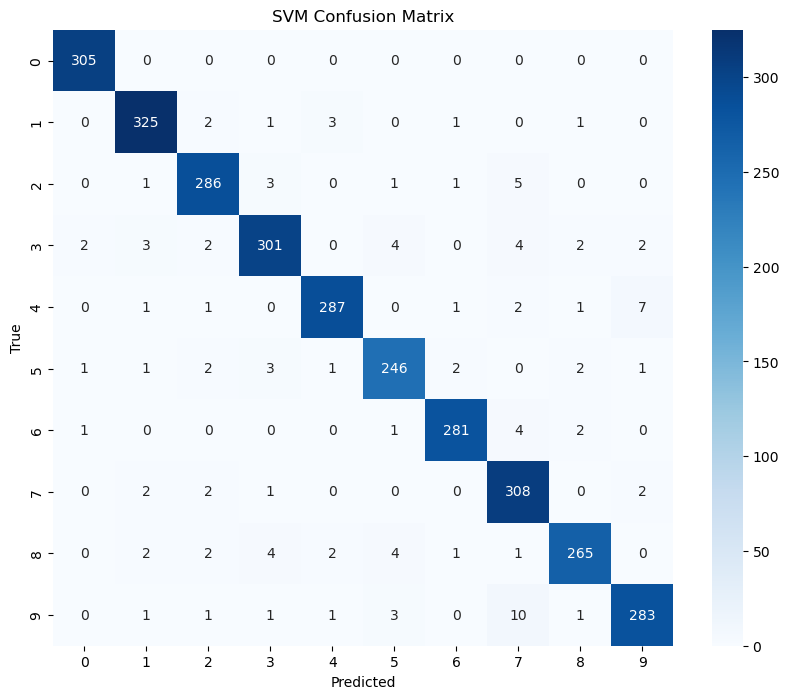

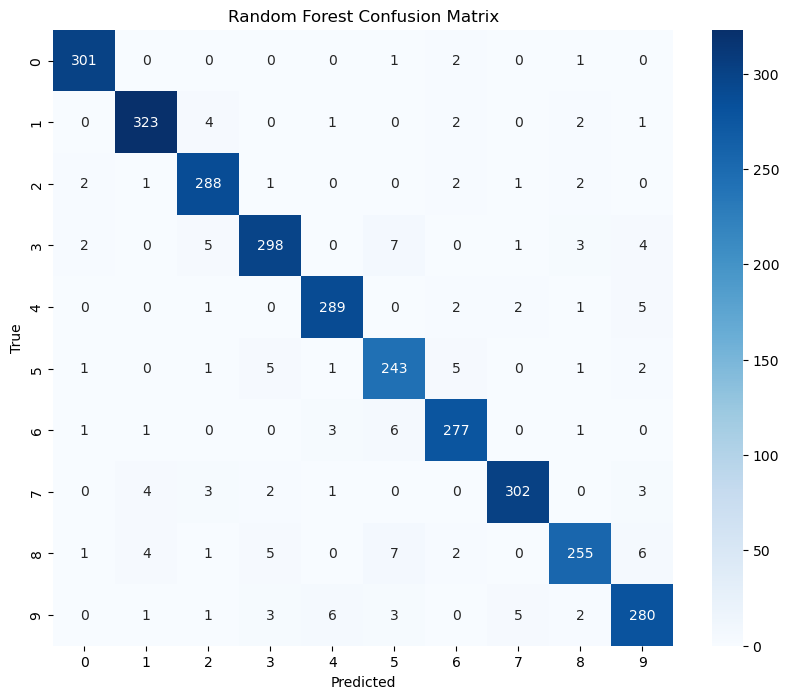

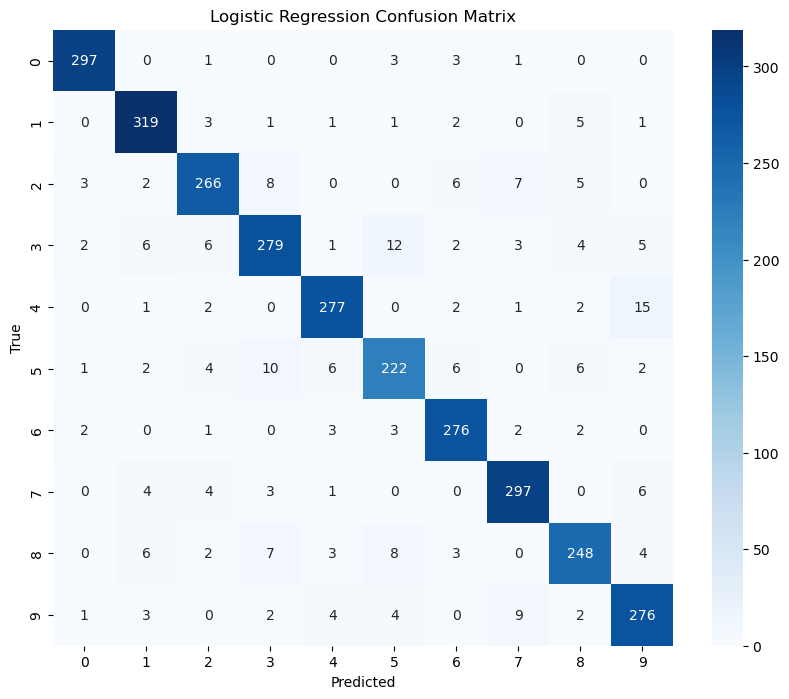

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')